In [1]:
from caveclient import CAVEclient
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tqdm

from standard_transform.datasets import minnie_ds

In [20]:
layer_bounds = np.load('layer_bounds_v3.npy')
height_bounds = np.load('height_bounds_v1.npy')
height_bounds = height_bounds-height_bounds[0]
height_bounds[1] = 780

In [3]:
client = CAVEclient('minnie65_public')
client.version = 1181

pf_df = client.materialize.tables.proofreading_status_and_strategy.get_all()

In [4]:
good_axons = ['axon_partially_extended', 'axon_fully_extended', 'axon_interareal']
root_ids = pf_df.query('strategy_axon in @good_axons')['pt_root_id']

In [5]:
ct_df = client.materialize.tables.aibs_metamodel_mtypes_v661_v2().query(desired_resolution=[1,1,1])
ct_df = ct_df.drop_duplicates('pt_root_id', keep=False)
ct_df['cell_type_simple'] = ct_df['cell_type'].replace(
    {
        'L2a': "L2",
        "L2b": "L2",
        "L2c": "L2",
        "L3a": "L3",
        "L3b": "L3",
        "L4a": "L4",
        "L4b": "L4",
        "L4c": "L4",
        "L5a": "L5",
        "L5b": "L5",
        "L5ET": "L5ET",
        "L5NP": "L5NP",
        "L6short-a": "L6",
        "L6short-b": "L6",
        "L6tall-a": "L6CT",
        "L6tall-b": "L6CT",
        "L6tall-c": "L6CT",
    }
)
ct_df['soma_depth'] = minnie_ds.transform_nm.apply_dataframe('pt_position', ct_df, projection='y')

In [6]:
all_cells = ct_df['pt_root_id'].values

In [ ]:
edgelist_typed = pd.read_csv('edgelist_typed.csv')

# Code that generated the edgelist:

# syn_dfs = []
# for rids_target in tqdm.tqdm(np.array_split(root_ids, 18)):
#     temp_df = client.materialize.synapse_query(pre_ids=rids_target)
#     syn_dfs.append( temp_df.query('post_pt_root_id in @all_cells') )
# syn_df = pd.concat(syn_dfs, ignore_index=True)
# edgelist = syn_df.groupby(['pre_pt_root_id', 'post_pt_root_id']).id.count().reset_index().rename(columns={'id': 'num_syn'})

# edgelist_typed = edgelist.merge(
#     ct_df[['pt_root_id','cell_type','classification_system', 'soma_depth']].rename(
#         columns={"cell_type":  "cell_type_post", "classification_system": "valence_post", "soma_depth":"soma_depth_post"}
#     ),
#     left_on='post_pt_root_id',
#     right_on="pt_root_id",
# ).drop(columns='pt_root_id').merge(
#     ct_df[['pt_root_id','cell_type','classification_system', 'soma_depth']].rename(
#         columns={"cell_type":  "cell_type_pre", "classification_system": "valence_pre", "soma_depth": "soma_depth_pre"}
#     ),
#     left_on='pre_pt_root_id',
#     right_on="pt_root_id",
# ).drop(columns='pt_root_id')

# edgelist_typed.to_csv('edgelist.csv', index=False)

/Users/caseysm/Work/OneOffs/pf-connectivity/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
100%|██████████| 18/18 [06:41<00:00, 22.32s/it]


<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
/var/folders/wq/w_ly72m51xq4y98tg0ddrpqc0000gn/T/ipykernel_91339/553304271.py:19: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Presyn. Soma Depth ($\mu$m)')
/var/folders/wq/w_ly72m51xq4y98tg0ddrpqc0000gn/T/ipykernel_91339/553304271.py:20: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('Postsyn. Soma Depth ($\mu$m)')


Text(0.5, 0, 'Postsyn. Soma Depth ($\\mu$m)')

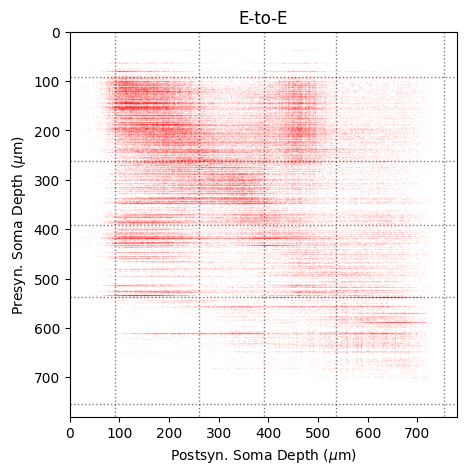

In [40]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)

sns.scatterplot(
    x='soma_depth_post',
    y='soma_depth_pre',
    s=1,
    alpha=0.04,
    data=edgelist_typed.query('valence_pre == "excitatory_neuron" and valence_post == "excitatory_neuron"'),
    color='r',
)

ax.set_xlim(*height_bounds)
ax.set_ylim(*height_bounds[::-1])

ax.hlines(layer_bounds, *height_bounds, color='k', alpha=0.5, linewidth=1, linestyle=':')
ax.vlines(layer_bounds, *height_bounds, color='k', alpha=0.5, linewidth=1, linestyle=':')

ax.set_title('E-to-E')
ax.set_ylabel('Presyn. Soma Depth ($\mu$m)')
ax.set_xlabel('Postsyn. Soma Depth ($\mu$m)')

# fig.savefig("soma_depth_connectivity_e_to_e.pdf")

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
/var/folders/wq/w_ly72m51xq4y98tg0ddrpqc0000gn/T/ipykernel_91339/1510969599.py:19: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('Presyn. Soma Depth ($\mu$m)')
/var/folders/wq/w_ly72m51xq4y98tg0ddrpqc0000gn/T/ipykernel_91339/1510969599.py:20: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Postsyn. Soma Depth ($\mu$m)')


Text(0, 0.5, 'Postsyn. Soma Depth ($\\mu$m)')

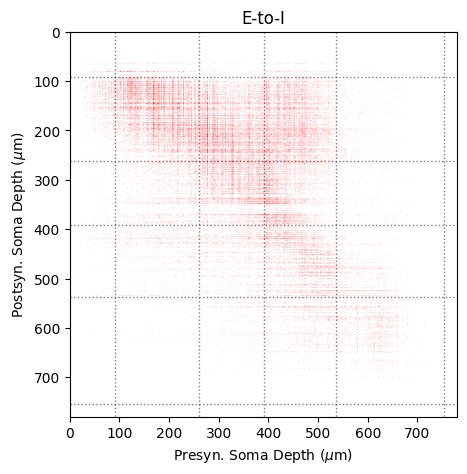

In [34]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)

sns.scatterplot(
    x='soma_depth_post',
    y='soma_depth_pre',
    s=1,
    alpha=0.04,
    data=edgelist_typed.query('valence_pre == "excitatory_neuron" and valence_post == "inhibitory_neuron"'),
    color='r',
)

ax.set_xlim(*height_bounds)
ax.set_ylim(*height_bounds[::-1])

ax.hlines(layer_bounds, *height_bounds, color='k', alpha=0.5, linewidth=1, linestyle=':')
ax.vlines(layer_bounds, *height_bounds, color='k', alpha=0.5, linewidth=1, linestyle=':')

ax.set_title('E-to-I')
ax.set_xlabel('Presyn. Soma Depth ($\mu$m)')
ax.set_ylabel('Postsyn. Soma Depth ($\mu$m)')

# fig.savefig("soma_depth_connectivity_e_to_i.pdf")

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
/var/folders/wq/w_ly72m51xq4y98tg0ddrpqc0000gn/T/ipykernel_91339/878153499.py:19: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('Presyn. Soma Depth ($\mu$m)')
/var/folders/wq/w_ly72m51xq4y98tg0ddrpqc0000gn/T/ipykernel_91339/878153499.py:20: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Postsyn. Soma Depth ($\mu$m)')


Text(0, 0.5, 'Postsyn. Soma Depth ($\\mu$m)')

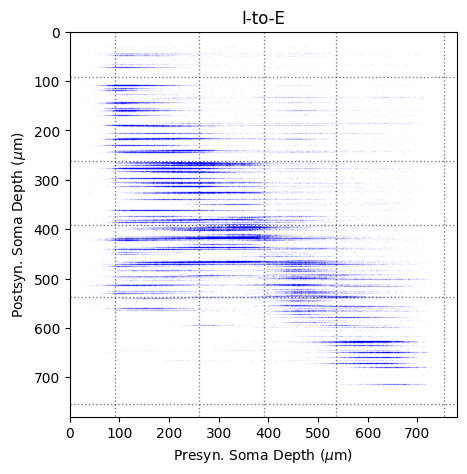

In [41]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)

sns.scatterplot(
    x='soma_depth_post',
    y='soma_depth_pre',
    s=1,
    alpha=0.03,
    data=edgelist_typed.query('valence_pre == "inhibitory_neuron" and valence_post == "excitatory_neuron"'),
    color='b',
)

ax.set_xlim(*height_bounds)
ax.set_ylim(*height_bounds[::-1])

ax.hlines(layer_bounds, *height_bounds, color='k', alpha=0.5, linewidth=1, linestyle=':')
ax.vlines(layer_bounds, *height_bounds, color='k', alpha=0.5, linewidth=1, linestyle=':')

ax.set_title('I-to-E')
ax.set_xlabel('Presyn. Soma Depth ($\mu$m)')
ax.set_ylabel('Postsyn. Soma Depth ($\mu$m)')

# fig.savefig("soma_depth_connectivity_i_to_e.pdf")

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
/var/folders/wq/w_ly72m51xq4y98tg0ddrpqc0000gn/T/ipykernel_91339/2171546735.py:19: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('Presyn. Soma Depth ($\mu$m)')
/var/folders/wq/w_ly72m51xq4y98tg0ddrpqc0000gn/T/ipykernel_91339/2171546735.py:20: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Postsyn. Soma Depth ($\mu$m)')


Text(0, 0.5, 'Postsyn. Soma Depth ($\\mu$m)')

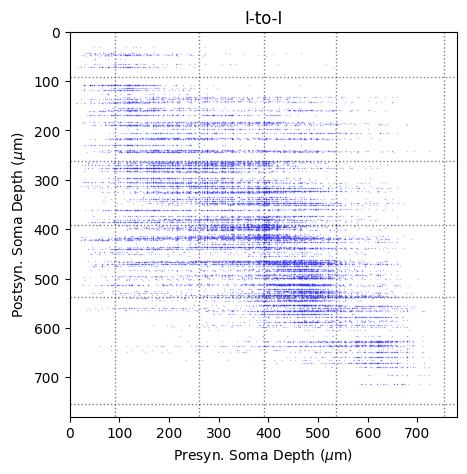

In [44]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)

sns.scatterplot(
    x='soma_depth_post',
    y='soma_depth_pre',
    s=1,
    alpha=0.25,
    data=edgelist_typed.query('valence_pre == "inhibitory_neuron" and valence_post == "inhibitory_neuron"'),
    color='b',
)

ax.set_xlim(*height_bounds)
ax.set_ylim(*height_bounds[::-1])

ax.hlines(layer_bounds, *height_bounds, color='k', alpha=0.5, linewidth=1, linestyle=':')
ax.vlines(layer_bounds, *height_bounds, color='k', alpha=0.5, linewidth=1, linestyle=':')

ax.set_title('I-to-I')
ax.set_xlabel('Presyn. Soma Depth ($\mu$m)')
ax.set_ylabel('Postsyn. Soma Depth ($\mu$m)')

# fig.savefig("soma_depth_connectivity_i_to_i.pdf")